# W207.6 Final Project on Housing Price Predictions 

Lee Moore & Paul Petit

Link to our project proposal: https://colab.research.google.com/drive/14nNfLZx_k-AgQkbP_Br5JxTUM_p0H38_#scrollTo=5lBt6CXmpvxU

# 1 Load Packages

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# SK-learn libraries for learning.
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.dummy import DummyRegressor

#ignore useless warnings
import warnings 
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

ModuleNotFoundError: No module named 'xgboost'

# 2 Load Data

via Github: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

In [2]:
# Set the randomizer seed so results are the same each time.
np.random.seed(0)

#import train data from Github
url = 'https://raw.githubusercontent.com/leebean337/housing/master/train.csv'
train = pd.read_csv(url)

print(f"Original training data examples = {train.shape[0]}, columns= {train.shape[1]}")

Original training data examples = 1460, columns= 81


# 3 Exploratory Analysis

## 3.1 Variable categorization

Below we have a list of all the variables in our data set as provided by Kaggle. We grouped the variables into a hierarchical intuitive structure.

**OUTCOME VARIABLE**
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

**EXPLANATORY VARIABLES**
* **Building Class and Zoning Variables**
 * MSSubClass: The building class
 * BldgType: Type of dwelling
 * HouseStyle: Style of dwelling
 
* **Location variables**
  * Neighborhood: Physical locations within Ames city limits
  * MSZoning: The general zoning classification

* **Lot Variables**
 * LotFrontage: Linear feet of street connected to property
 * LotArea: Lot size in square feet
 * LotShape: General shape of property
 * LotConfig: Lot configuration
 * Street: Type of road access
 * Alley: Type of alley access
 * LandContour: Flatness of the property
 * LandSlope: Slope of property
 * Condition1: Proximity to main road or railroad
 * Condition2: Proximity to main road or railroad (if a second is present)

* **Building Features**
 * Feature details
   * Utilities: Type of utilities available
   * RoofStyle: Type of roof
   * RoofMatl: Roof material
   * Exterior1st: Exterior covering on house
   * Exterior2nd: Exterior covering on house (if more than one material)
   * MasVnrType: Masonry veneer type
   * Foundation: Type of foundation
   * BsmtExposure: Walkout or garden level basement walls
   * Heating: Type of heating
   * CentralAir: Central air conditioning
   * Electrical: Electrical system
   * BsmtFullBath: Basement full bathrooms
   * BsmtHalfBath: Basement half bathrooms
   * FullBath: Full bathrooms above grade
   * HalfBath: Half baths above grade
   * BedroomAbvGr: Number of bedrooms above basement level
   * KitchenAbvGr: Number of kitchens
   * TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
   * Fireplaces: Number of fireplaces
   * GarageType: Garage location
   * GarageFinish: Interior finish of the garage
   * GarageCars: Size of garage in car capacity
   * PavedDrive: Paved driveway
   * MiscFeature: Miscellaneous feature not covered in other categories
   * MiscVal: $Value of miscellaneous feature 
   * Functional: Home functionality rating
 * Feature quality & condition
   * OverallQual: Overall material and finish quality
   * OverallCond: Overall condition rating
   * ExterQual: Exterior material quality
   * ExterCond: Present condition of the material on the exterior
   * BsmtQual: Height of the basement
   * BsmtCond: General condition of the basement
   * BsmtFinType1: Quality of basement finished area
   * BsmtFinType2: Quality of second finished area (if present)
   * HeatingQC: Heating quality and condition
   * KitchenQual: Kitchen quality
   * FireplaceQu: Fireplace quality
   * PoolQC: Pool quality
   * Fence: Fence quality
   * GarageQual: Garage quality
   * GarageCond: Garage condition
 * Feature square footage
   * MasVnrArea: Masonry veneer area in square feet
   * BsmtFinSF1: Type 1 finished square feet
   * BsmtFinSF2: Type 2 finished square feet
   * BsmtUnfSF: Unfinished square feet of basement area
   * TotalBsmtSF: Total square feet of basement area
   * 1stFlrSF: First Floor square feet
   * 2ndFlrSF: Second floor square feet
   * LowQualFinSF: Low quality finished square feet (all floors)
   * GrLivArea: Above grade (ground) living area square feet
   * WoodDeckSF: Wood deck area in square feet
   * OpenPorchSF: Open porch area in square feet
   * EnclosedPorch: Enclosed porch area in square feet
   * 3SsnPorch: Three season porch area in square feet
   * ScreenPorch: Screen porch area in square feet
   * PoolArea: Pool area in square feet
   * GarageArea: Size of garage in square feet
* **Sale Variables**
  * MoSold: Month Sold
  * YrSold: Year Sold
  * SaleType: Type of sale
  * SaleCondition: Condition of sale
* **Build Date Features**
  * YearBuilt: Original construction date
  * YearRemodAdd: Remodel date
  * GarageYrBlt: Year garage was built


## 3.2 Data Discovery and Visualization

In [3]:
#Examine data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The first 5 records, 5 properties and the values for their various features 81 features

In [4]:
#descriptive statistics on numerical data (no unexpected values at first glance)
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Key statistics for the numerical (non-categorical) variables in our data set. Gives us a first glance at where we'll see missing values, which we'll have to impute later.

In [0]:
print("Number of features: ", len(train.columns))

Number of features:  81


## 3.3 Variable Categorization

To help us further explore our data and later examine the effect of training our models on various sets of features, we'll organize the full set of features we have into various packages defined in different technical or intuitive ways. 

### 3.3.1 Features Packages

#### Categorical vs. Continuous and Discrete Numeric Features

In [5]:
# Categorical variables: variables for which the value type in our train data is 'object' (as opposed to float or int)
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
                        'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                        'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
                        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
                        'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                        'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
                        'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass']

# Continuous numeric features: variables for which the value type in our train data is a float or an int with more than several possible values
continuous_numeric_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                               'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                               'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                               '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

# Discrete numeric features: variables for which the value type in our train data is a float or an int with just several possible values
discrete_numeric_features = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath',
                             'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                             'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold',
                             'YrSold']

numeric_features = continuous_numeric_features + discrete_numeric_features

#### General Building Features by Feature Class

Feature classes are eg. quality and condition features, square footage features, etc.

In [6]:
# Building class features
building_class_features = ['MSSubClass', 'BldgType', 'HouseStyle']

# Building location features
building_location_features = ['MSZoning', 'Neighborhood']

# Building lot features
building_lot_features = ['LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'Street', 
                         'Alley', 'LandContour', 'LandSlope', 'Condition1', 'Condition2']

# Building feature details
building_features_detail = ['Utilities', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                            'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating', 'CentralAir',
                            'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                            'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
                            'GarageFinish', 'GarageCars', 'PavedDrive', 'MiscFeature', 'MiscVal',
                            'Functional']

# Building feature quality and condition features
building_features_qc = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual',
                        'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                        'FireplaceQu', 'PoolQC', 'Fence', 'GarageQual', 'GarageCond']

# Building square footage features
building_features_sqft = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
                          '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF',
                          'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'GarageArea']

# building age features
building_age_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

# All building feature details
building_features_detail_all = building_features_detail + building_features_qc + building_features_sqft

# All building feature details with class, class, location, and lot features as well
building_features = building_class_features + building_location_features + building_lot_features + building_age_features + building_features_detail_all

# sale variables
building_sale_features = ['MoSold', 'YrSold', 'SaleType', 'SaleCondition']

#### General Building Features by Feature Type

Feature type are eg. bedrooms, bathrooms, garage, basement, etc.

Please note, this package does not contain a set of features that are  mutually exclusive and collectively exhaustive.

In [7]:
# building features components
building_features_bedrooms = ['BedroomAbvGr', 'TotRmsAbvGrd']
building_features_bathrooms = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
building_features_sf_flr = ['1stFlrSF', '2ndFlrSF']
building_features_garage = ['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
                            'GarageArea']
building_features_basement = ['BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtCond', 
                              'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF']
building_features_kitchen = ['KitchenAbvGr', 'KitchenQual']
building_features_deck = ['WoodDeckSF']
building_features_porch = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
building_features_pool = ['PoolQC', 'PoolArea']
building_features_exterior_misc = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
                                   'PavedDrive', 'MasVnrType', 'MasVnrArea']
building_features_interior_misc = ['Utilities', 'BsmtExposure','Heating', 'CentralAir', 'Electrical',
                                   'Fireplaces']

# building features feature sets
building_features_interior = building_features_bedrooms + building_features_bathrooms + building_features_sf_flr + building_features_garage + building_features_basement + building_features_kitchen + building_features_interior_misc
building_features_exerior = building_features_deck + building_features_porch + building_features_pool + building_features_exterior_misc

## 3.4 Data Visualization

Before we plot, we'll define functions that will make this easier below.

In [8]:
# Set up plot with len(package) subplots (maybe made into a square)
# Plot a countplot using seaborn with dataframe = train and x = package_item and ax = first item in axes list
def count_plot(package):    
    axes = []
    for i, f in enumerate(package):
#         cols = 3
#         if len(package) % cols == 0:
#             rows = (len(package) // cols)
#         else: 
#             rows = (len(package) // cols) + 1
        fig, ax = plt.subplots()
        axes.append(ax)
        if train[f].dtype in ['int64', 'int32', 'float']:
            axes[i].set_title('Histogram of ' + str(f))
            sns.distplot(train[f][train[f].notnull()], ax=axes[i])
        elif len(train[f].unique()) > 12:
            axes[i].set_title('Bar Plot of ' + str(f))
            sns.countplot(y=f, data=train, ax=axes[i], orient='h')
        else: 
            axes[i].set_title('Bar Plot of ' + str(f))
            sns.countplot(x=f, data=train, ax=axes[i], orient='v')
    plt.show()

We'll examine our data by feature class, a package that is mutually exclusive and collectively exhaustive and lends itself well to variable sets that are of similar data type. 

/Users/paulrpetit/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


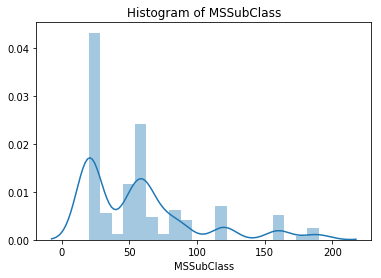

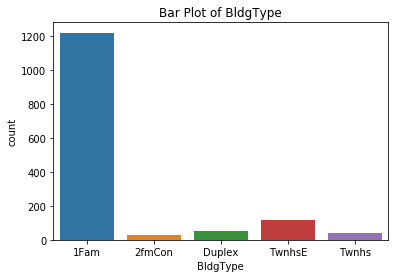

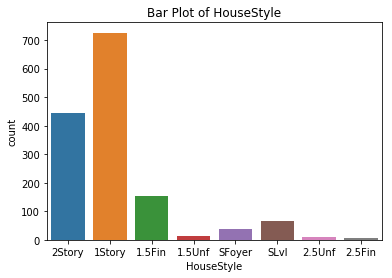

In [9]:
count_plot(building_class_features)

Note that most buildings are single family, 1- and 2-story houses.

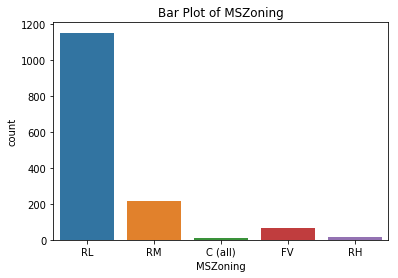

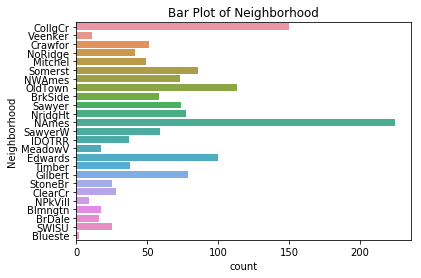

In [10]:
count_plot(building_location_features)

Note that most houses are in NAmes and CollgCr.

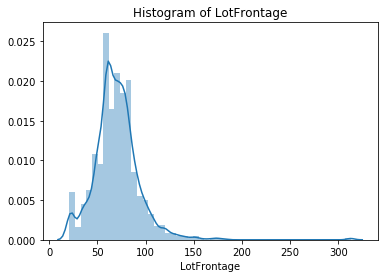

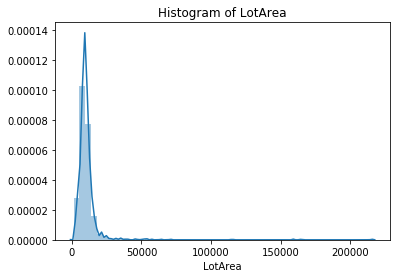

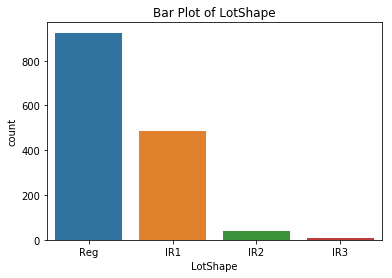

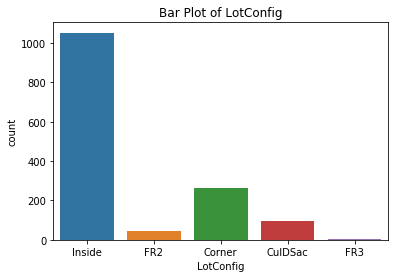

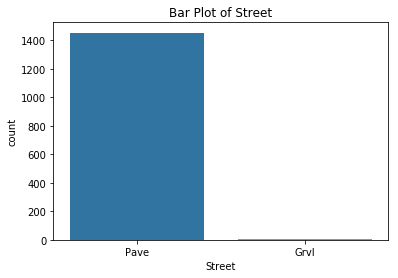

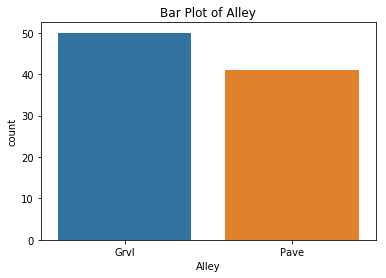

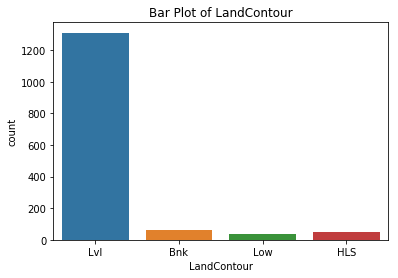

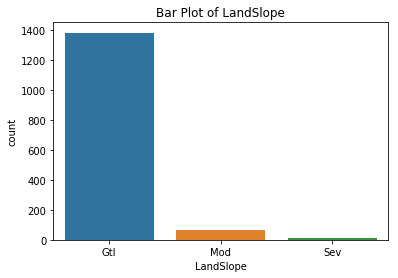

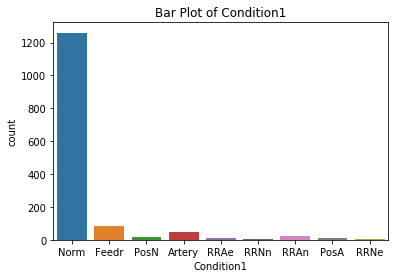

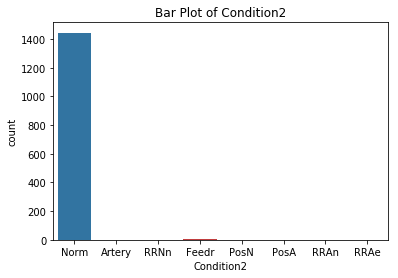

In [0]:
count_plot(building_lot_features)

Our continuous variables here clost to normally distributed with a skew to the right which may count in favor of transforming them with a log. The lion share of houses on paved roads and have normal lot properties and a gentle slope which is likely strongly correlated with them being level as well.

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


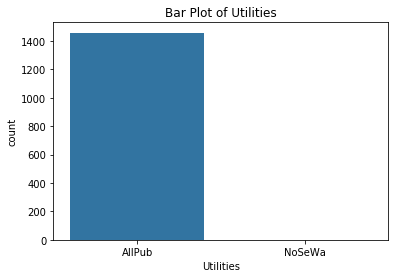

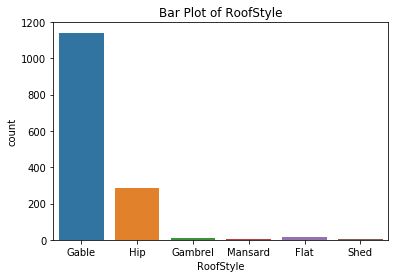

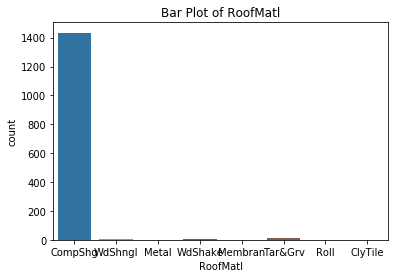

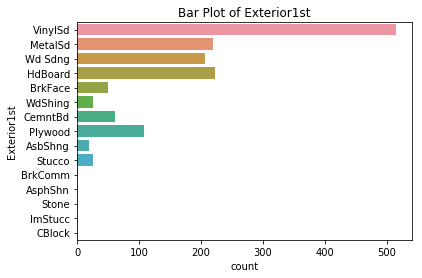

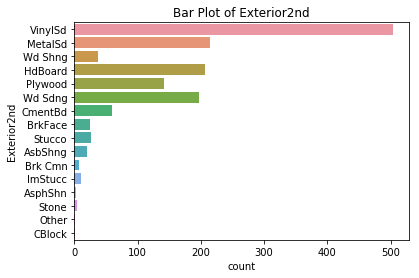

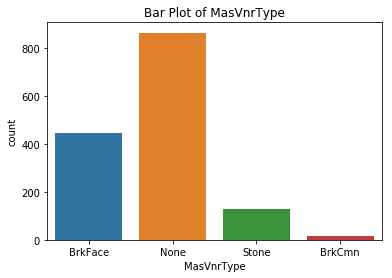

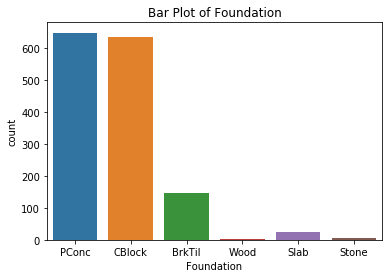

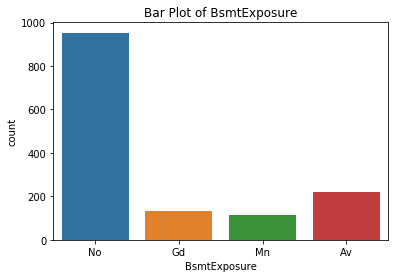

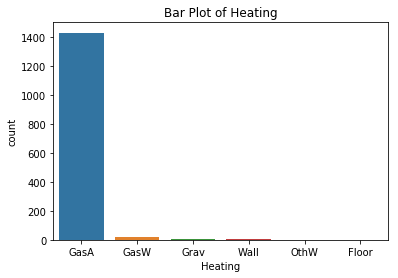

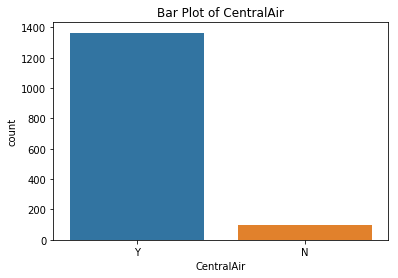

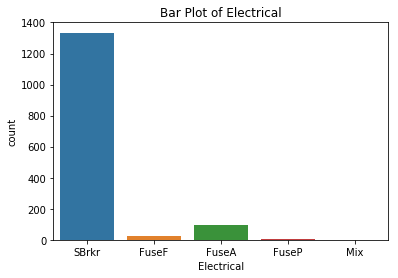

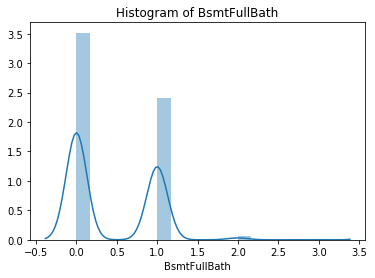

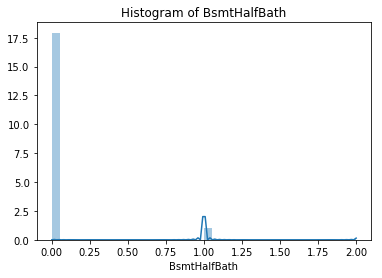

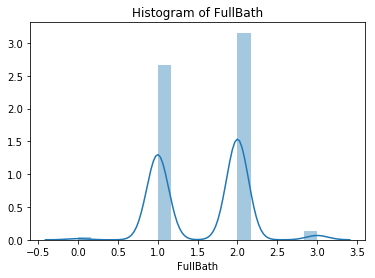

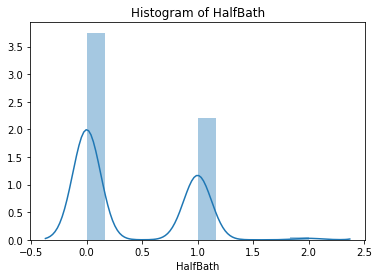

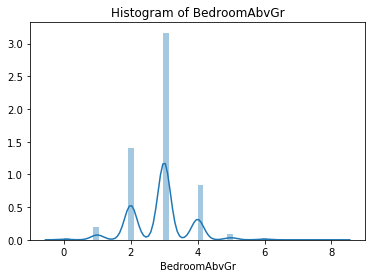

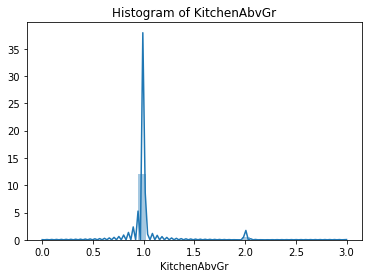

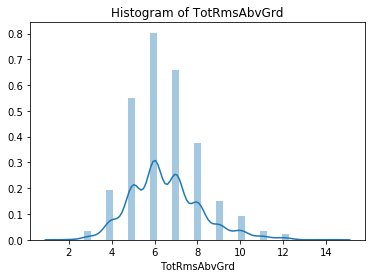

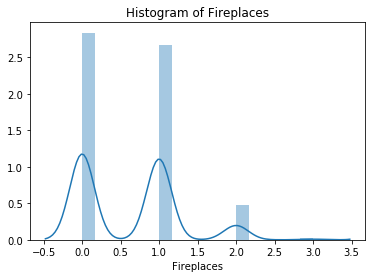

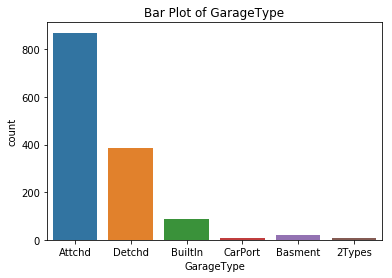

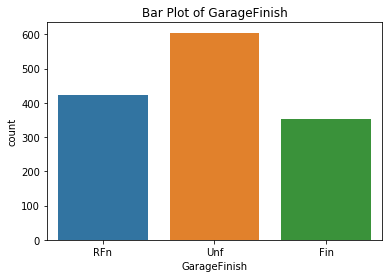

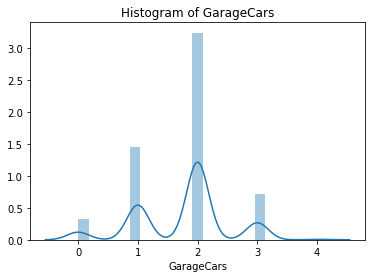

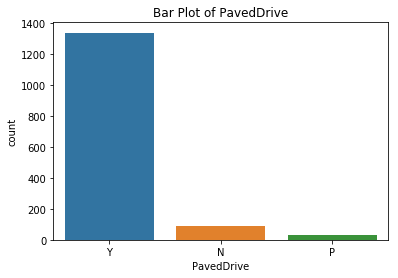

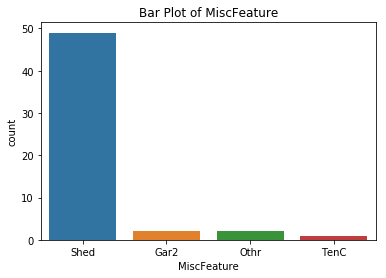

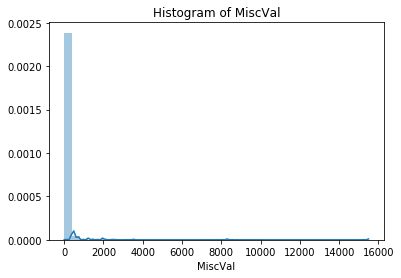

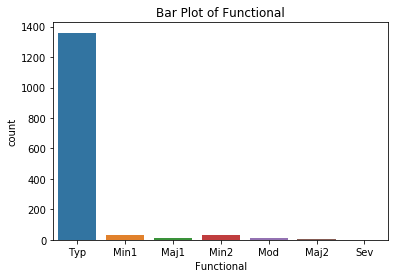

In [0]:
count_plot(building_features_detail)

Bedrooms and car garages tend to be normally distributed

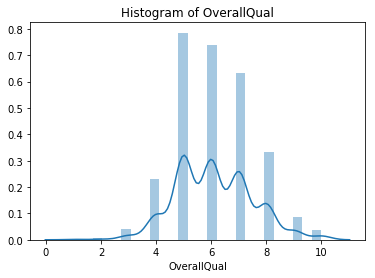

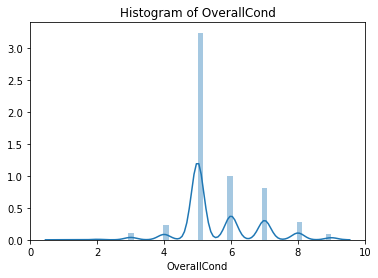

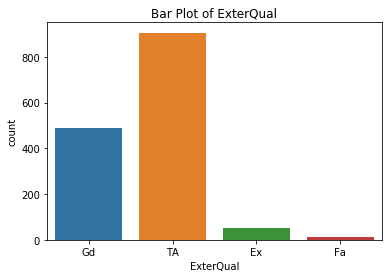

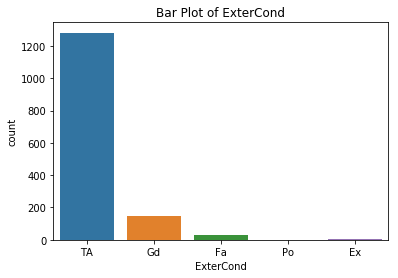

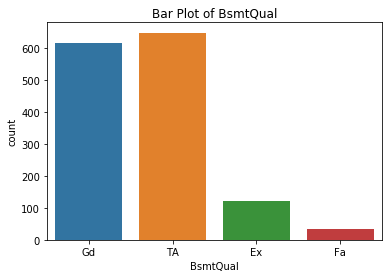

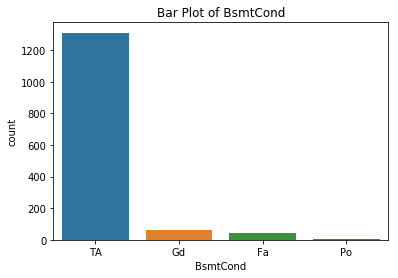

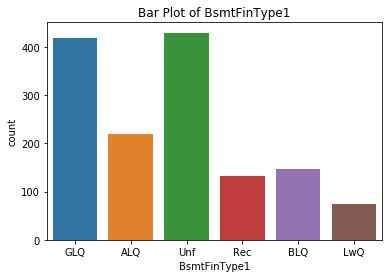

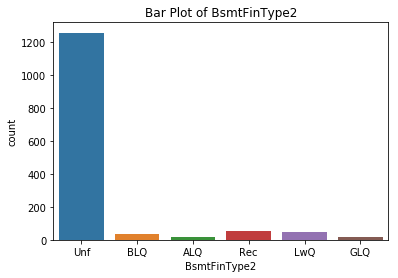

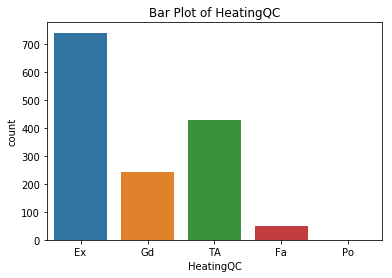

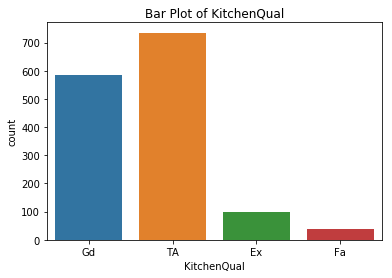

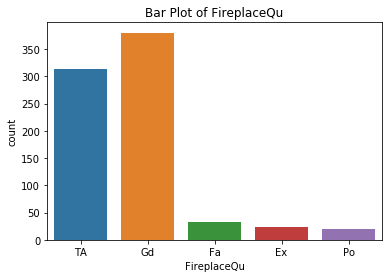

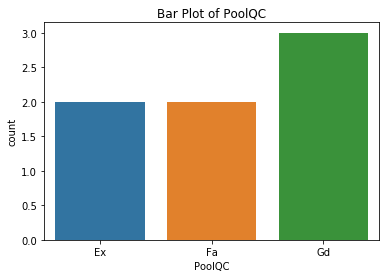

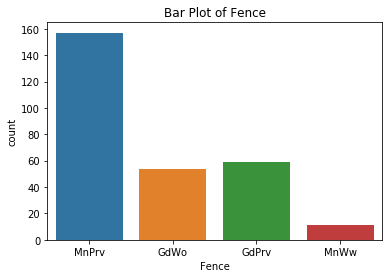

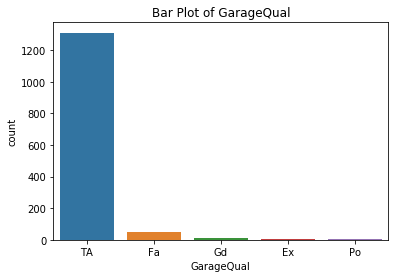

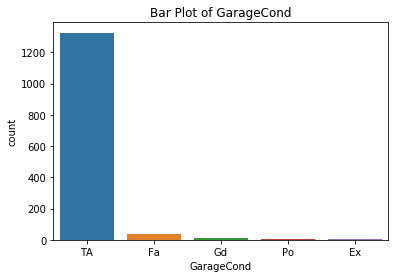

In [0]:
count_plot(building_features_qc)

The ordinality of quality and condition metrics is lost in these bar charts so we will likely want to transform them. Most of the qual/cond values seem to cluster around "typical." Overall quality and condition seem to be close to normally distributed.

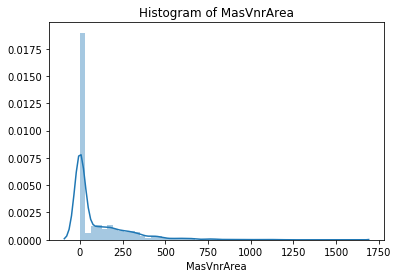

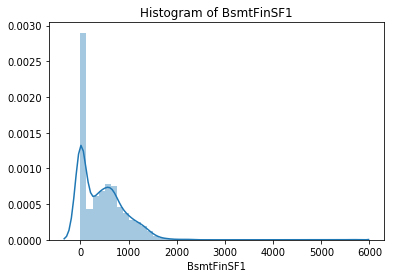

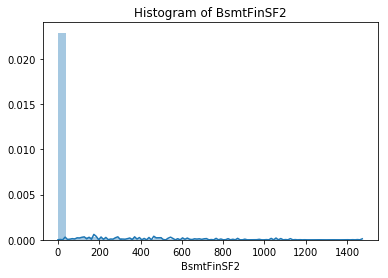

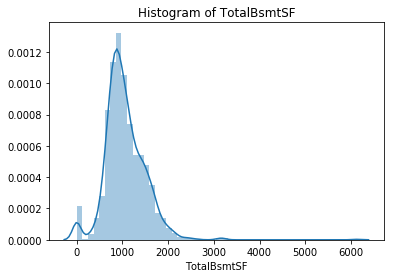

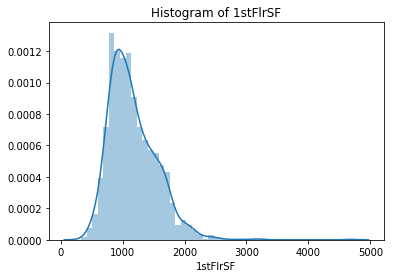

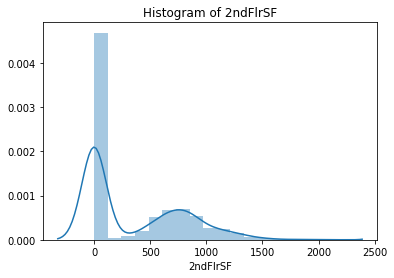

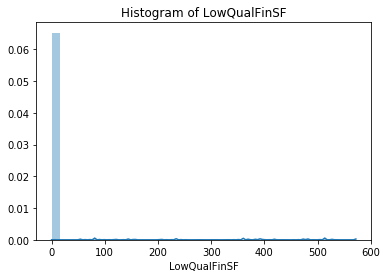

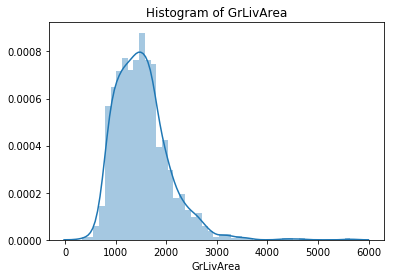

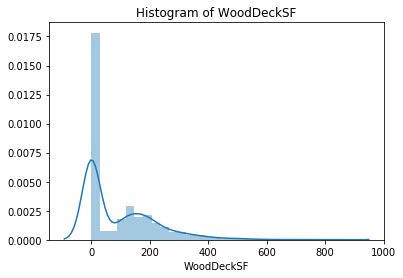

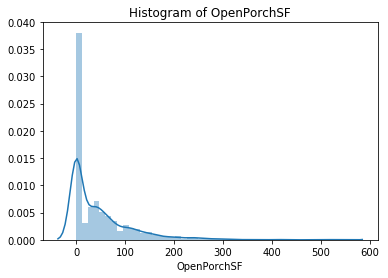

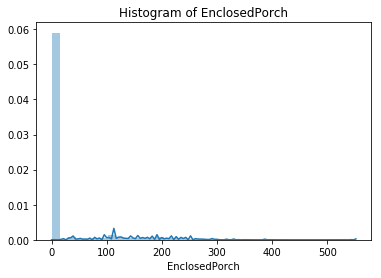

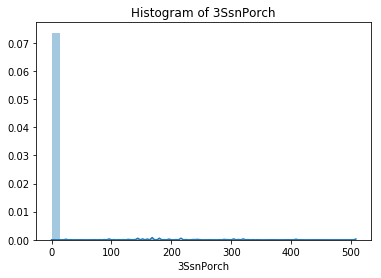

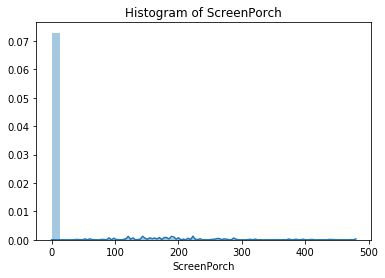

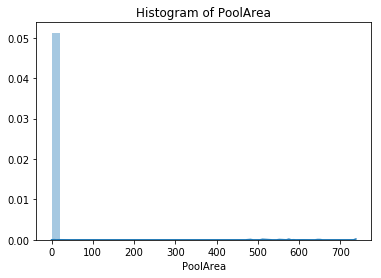

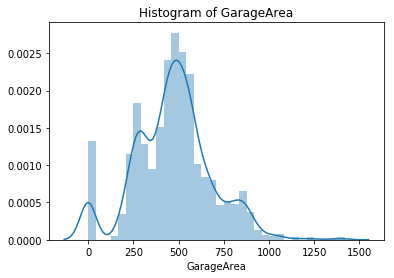

In [0]:
count_plot(building_features_sqft)

Many of the square footage measurements have a spike at 0 and a right tale which may count in favor of taking an adjusted logarithmic transformation of them. The spikes at 0 indicate that the house doesn't have a certain feature and as such we may consider imputing 0s or aggregating packages of houses based on the features they do and don't have.

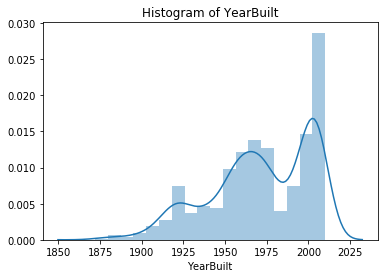

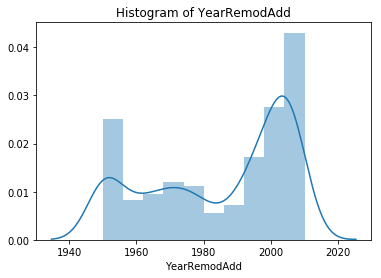

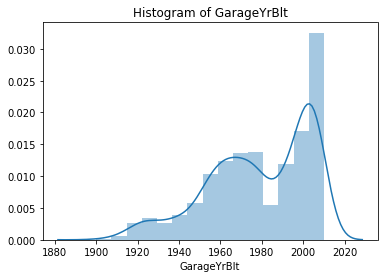

In [0]:
count_plot(building_age_features)

More houses have been built over time indicating that most houses are young. Newer houses likely had garages built whereas older houses didn't. There seems to be an intereting bi-modal distribution of remodels.

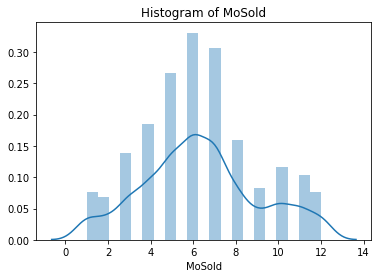

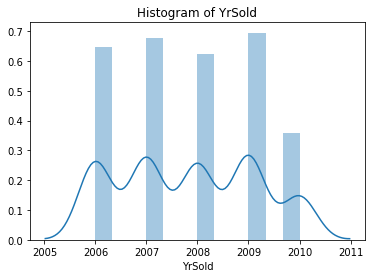

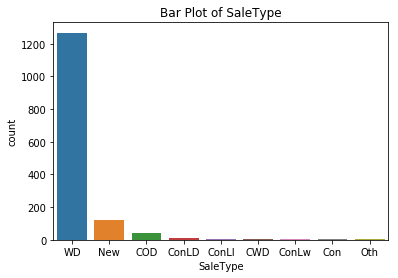

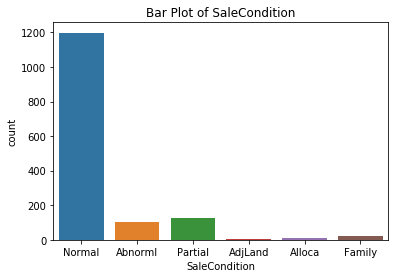

In [0]:
count_plot(building_sale_features)

Houses are most often sold in the summer. We likely don't have a full year's worth of data for 2010 because of the drop in sales.The sale condition of the house is most often normal.

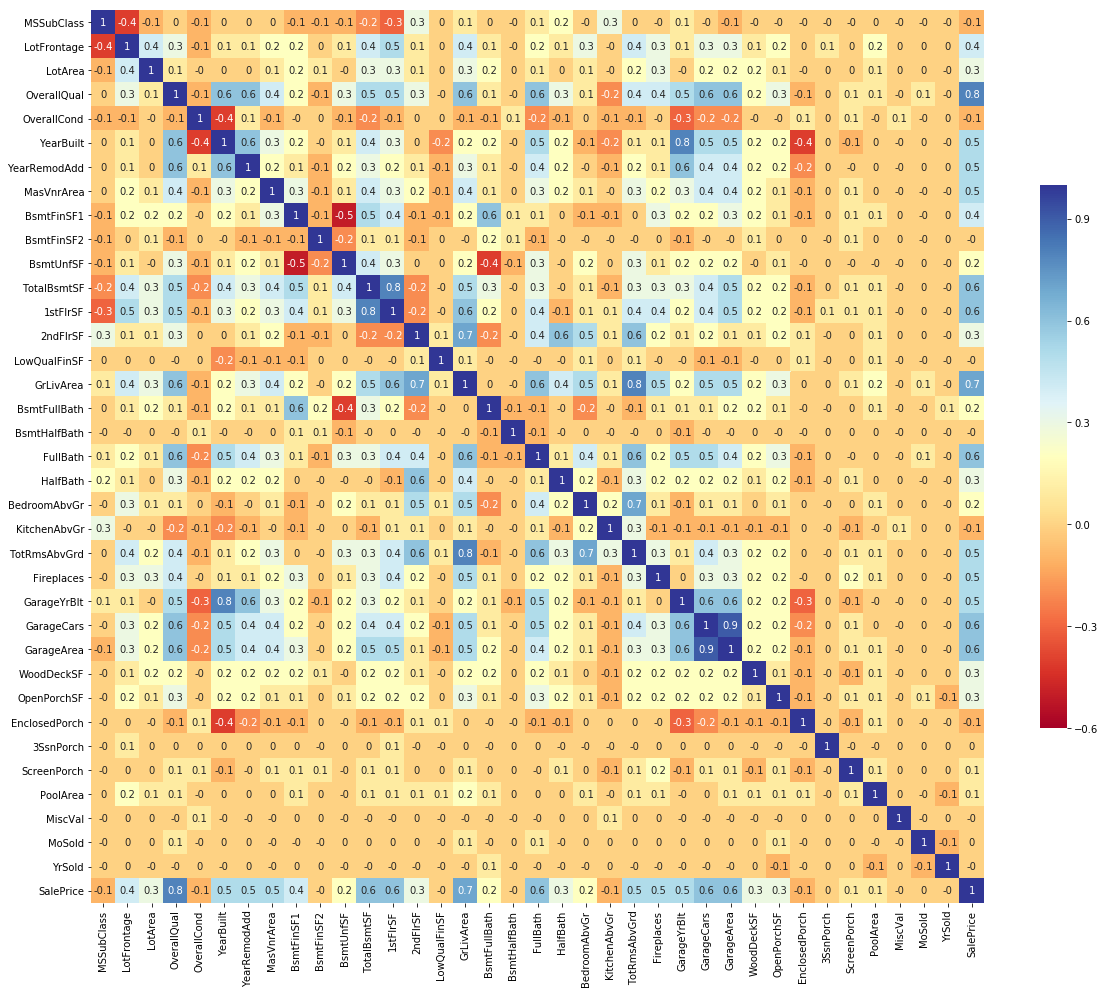

In [12]:
# Create correlation matrix to visualize correlations between variables
corr_round = train.drop('Id', axis=1).corr().round(1)
plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr_round, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, 
            square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True)

In [51]:
# correlations between SalePrice and other variables sorted by their absolute value
corr = train.corr()
corr['SalePrice'].abs().sort_values(axis=0, ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

In [83]:
def highly_correlated_vars(threshold):
    high_corr_fields = []
    for row in corr.index.values:
        for col in corr.columns.values:
            if col != row and col != 'SalePrice' and row != 'SalePrice' and corr[col][row] > threshold:
                high_corr_fields.append((row, col, corr[col][row]))

    std_lst = sorted(high_corr_fields, key=lambda tup: tup[2], reverse=True)
    for i in std_lst[1::2]:
        print('Variable 1: ', i[0], '\nVariable 2: ', i[1], '\nCorrelation: ', i[2], '\n')
        
highly_correlated_vars(0.6)

Variable 1:  GarageArea 
Variable 2:  GarageCars 
Correlation:  0.8824754142814603 

Variable 1:  GarageYrBlt 
Variable 2:  YearBuilt 
Correlation:  0.8256674841743434 

Variable 1:  TotRmsAbvGrd 
Variable 2:  GrLivArea 
Correlation:  0.8254893743088377 

Variable 1:  1stFlrSF 
Variable 2:  TotalBsmtSF 
Correlation:  0.8195299750050355 

Variable 1:  GrLivArea 
Variable 2:  2ndFlrSF 
Correlation:  0.6875010641666008 

Variable 1:  TotRmsAbvGrd 
Variable 2:  BedroomAbvGr 
Correlation:  0.6766199357426479 

Variable 1:  BsmtFullBath 
Variable 2:  BsmtFinSF1 
Correlation:  0.6492117535742737 

Variable 1:  GarageYrBlt 
Variable 2:  YearRemodAdd 
Correlation:  0.6422767797035414 

Variable 1:  FullBath 
Variable 2:  GrLivArea 
Correlation:  0.6300116462511144 

Variable 1:  TotRmsAbvGrd 
Variable 2:  2ndFlrSF 
Correlation:  0.6164226354915353 

Variable 1:  HalfBath 
Variable 2:  2ndFlrSF 
Correlation:  0.6097073002717444 

Variable 1:  GarageCars 
Variable 2:  OverallQual 
Correlation:  0

In [50]:
a = 6
print(a)

6


We see the top 10 features most corrlated with SalePrice are: OverallQual, GrLivArea, GarageCars, GarageArea, etc.

# 4 Data Manipulation and Feature Engineering 

## 4.1 Cleaning data, managing missing data, and basic transformations

The following section provides the functions developed to ensure a traing data set has no missing data and categorical variables are recoded with dummies (one hot encoding). Included here as well is a function that returns the RMSE of a random forest regressor on a dataframe - this is useful for quickly testing the impact of feature engineering adjustments on the accuracy of the model without running the whole notebook each time.

In [0]:
#function to do initial cleaning and imputing missing values


def clean_and_missing(df):

    #remove ID since won't use as part of the models
    df.drop(['Id'], axis=1, inplace=True)

    # MSSubClass variable misclassified as numeric, adjust this
    df['MSSubClass'] = df['MSSubClass'].apply(str)

    # Separate out numeric and categorical variables
    categorical = []
    numeric = []
    for i in df.columns:
        if df[i].dtype == 'object':
            categorical.append(i)
        else:
            numeric.append(i)

    #Relabel all missing categorical data as 'NA'or 'None'
    for feature in categorical: 
        if df[feature].isnull().sum() != 0:
            if feature == 'MasVnrType':
                df.update(df[feature].fillna('None'))
            else:
                df.update(df[feature].fillna('NA')) 


    #Fill all missing numeric data with zero (on median for Garage year)
    for feature in numeric: 
        if df[feature].isnull().sum() != 0:
          if feature == 'GarageYrBlt':
            median = train_data[feature].median()
            train_data.update(train_data[feature].fillna(median, inplace=True)) 
          else:
            df.update(df[numeric].fillna(0))
            
    return df


In [0]:
#function to create dummies for all categorical variables
def one_hot_encoding(df):
  df=pd.get_dummies(df).reset_index(drop=True)
  return df

#function to create dummies for all categorical variables and remove those that
#are just dummies for 'missing'
def one_hot_encoding_removeNA(df):
  df=pd.get_dummies(df).reset_index(drop=True)
  for i in df.columns:
    if i[-3:] =='_NA' or i[-5:] == '_None':
        df.drop(i,axis=1,inplace=True)
  return df

In [0]:
#Quick TEMPORARY test function to try new dataframe on a randomforest regressor
def quick_rf_test(df):
  
  #transform SalesPrice with log(1+x) keep in new variables 'train_labels_log' 
  train_labels_log = np.log1p(train['SalePrice'])

  # Setup cross validation folds
  k_fold = KFold(n_splits=5, random_state=0, shuffle=True)

  # Define cross-validation error metric
  def rmse_cv(model):
      rmse = np.sqrt(-cross_val_score(model, X=df, y=train_labels_log, scoring="neg_mean_squared_error", cv=k_fold))
      return (rmse)

  # Set up & Train Random Forest Regressor
  ranfor_reg = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=25))
  score = rmse_cv(ranfor_reg)
  print(f"Random Forest Regression with Cross Validation: mean({score.mean()}),sd ({score.std()})")

## 4.2 Feature Engineering

Various functions have been created in order to create new features based on various conditions. Putting these in functions will allow us to validate which of these (and in what order) provides the most improvement to model performance.

New Features developed:
 1.  *TotalLivableSF*: Total occupiable (living) square footage (sum of basement, 1st floor, 2nd floor, garage, wood deck, and open porch sqrft)
 2. *LivableSFPerLotArea*: Portion lot area that is livable (living total square footage divided by lot area)
 3. *TotalBaths*: Total number of baths
 4. *PercentBedrmtoRooms*: Portion of room that are bedrooms
 5. *YearsSinceRemodel*: Years since remodel if there was a remodel; years since build otherwise
 

In [0]:
def train_aug_features():
    """
    A function that augments our train dataframe with additional features
    These additional features are engineered to imporove the predictive power of our models
    """
    # Create a duplicate dataframe to feature engineer with
    train_aug = train.copy()

    # Total occupiable (living) square footage in the property
    train_aug['TotalLivableSF'] = train_aug['TotalBsmtSF'] + train_aug['1stFlrSF'] + train_aug['2ndFlrSF'] + train_aug['GarageArea'] + train_aug['WoodDeckSF'] + train_aug['OpenPorchSF']

    # Total Living Area divided by LotArea
    train_aug['LivableSFPerLotArea'] = train_aug['TotalLivableSF'] / train_aug['LotArea']

    # Total count of all bathrooms including full and half through the entire building
    train_aug['TotalBaths'] = train_aug['BsmtFullBath'] + train_aug['BsmtHalfBath'] + train_aug['HalfBath'] + train_aug['FullBath']

    # Percentage of total rooms are bedrooms
    train_aug['PercentBedroomtoRooms'] = train_aug['BedroomAbvGr'] / train_aug['TotRmsAbvGrd']

    # Number of years since last remodel, if there never was one it would be since it was built
    train_aug['YearSinceRemodel'] = 2016 - ((train_aug['YearRemodAdd'] - train_aug['YearBuilt']) + train_aug['YearBuilt'])
    
    return train_aug

train_aug = train_aug_features()

In [0]:
# correlation matrix with new features
# 4 of our 5 new features are strongly correlated indicating they may help improve our models
corr_aug = train_aug.corr()
corr_aug['SalePrice'].abs().sort_values(axis=0, ascending=False)

SalePrice                1.000000
TotalLivableSF           0.815688
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
TotalBaths               0.613005
1stFlrSF                 0.605852
FullBath                 0.560664
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
YearSinceRemodel         0.507101
YearRemodAdd             0.507101
GarageYrBlt              0.486362
MasVnrArea               0.477493
Fireplaces               0.466929
BsmtFinSF1               0.386420
LotFrontage              0.351799
PercentBedroomtoRooms    0.336085
WoodDeckSF               0.324413
2ndFlrSF                 0.319334
OpenPorchSF              0.315856
HalfBath                 0.284108
LotArea                  0.263843
BsmtFullBath             0.227122
BsmtUnfSF                0.214479
BedroomAbvGr             0.168213
KitchenAbvGr             0.135907
EnclosedPorch 

In [0]:
# adjoin additional continuous features to train_data set
def aug_to_train_data(df):
    """
    Adds engineered features from train_aug_features to train_data
    """
    df['TotalLivableSF'] = train_aug['TotalLivableSF']
    df['LivableSFPerLotArea'] = train_aug['LivableSFPerLotArea']
    df['TotalBaths'] = train_aug['TotalBaths']
    df['PercentBedroomtoRooms'] = train_aug['PercentBedroomtoRooms']
    df['YearSinceRemodel'] = train_aug['YearSinceRemodel']
    
    return df

Some of our variables indicate quality or condition (ie. ExterQual, BsmtQual, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond, PoolQC) and their values are categorical. Given these possible values are ordinal -- in the sense that there order is meaningful -- we will write a function that transforms these featues withing a dataframe to ordinal variables.


In [0]:
# Converts the series in a dataframe from categorical features to ordinal numeric features
def cat_to_ord(df):
    """
    Takes a single parameter, a dataframe
    Converts a series in the df from categorical features to ordinal numeric features
    Ex. 'Po' (Poor) becomes 0 and 'Ex' (Excellent) becomes 4
    """
    cat_to_ord_features = ['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual',
                           'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
    for series in cat_to_ord_features:
        df[series].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
    
    return df

In [0]:
# Converts the series in a dataframe from numeric features to categorical features
def ord_to_cat(df):
    """
    Takes a single parameter, a dataframe
    Converts a series in the df from ordinal numeric features to categorical features
    Ex. 2 becomes '2'
    """
    # This set of features identified as set with small (<5) ordinal numeric values
    ord_to_cat_features = ['OverallQual', 'OverallCond', 'BsmtFullBath', 
                           'BsmtHalfBath', 'Full Bath', 'Half Bath', 
                           'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
                           'GarageCars', 'YrSold', 'MSSubClass']
    for series in ord_to_cat_features:
        df[series] = df[series].apply(str)
    return df    

In [0]:
#function that squares numeric data based on list of numeric features
def squares(df, list_):
    """
    Takes two parameters, a dataframe and a list of column names for numeric variables. 
    Returns a new dataframe which includes the original df and a new set of 
    features which is the square of the ones named in the list. 
    Ex. 'LotArea' in the list returns a dataframe with 'LotArea_sq' added 
    """
    m = df.shape[1] #original number of features
    for i in list_:
        df = df.assign(newcol=pd.Series(df[i]*df[i]).values)   
        df.columns.values[m] = i + '_sq'
        m += 1
    return df
  
#function that squares numeric data based on list of numeric features
def cubes(df, list_):
    """
    Takes two parameters, a dataframe and a list of column names for numeric variables. 
    Returns a new dataframe which includes the original df and a new set of 
    features which is the cubes of the ones named in the list. 
    Ex. 'LotArea' in the list returns a dataframe with 'LotArea_cube' added 
    """
    m = df.shape[1] #original number of features
    for i in list_:
        df = df.assign(newcol=pd.Series(df[i]*df[i]*df[i]).values)   
        df.columns.values[m] = i + '_cube'
        m += 1
    return df
  
#function that logs numeric data based on list of numeric features
def logs(df, list_):
    """
    Takes two parameters, a dataframe and a list of column names for numeric variables.
    Returns a new dataframe which includes the original df and a new set of 
    features which is the square of the ones named in the list. 
    Ex. 'LotArea' in the list returns a dataframe with 'LotArea_sq' added 
    """
    m = df.shape[1] #original number of features
    for i in list_:
        df = df.assign(newcol=pd.Series(np.log(1.01+df[i])).values)   
        df.columns.values[m] = i + '_sq'
        m += 1
    return df
 

In [0]:
#Create initiate train_data dataframe: train data cleaned, missing data imputed 
#and one hot encoding performed with removing the _NA dummies

# set random seed
np.random.seed(0)

#create train data and run some transformations through it!
train_data = train.drop('SalePrice',axis=1)
train_data = clean_and_missing(train_data)

##############################
########## TESTING ###########
##############################

#train_data = train_data[building_features_sqft]
# train_data = train_aug_features(train_data)

##############################

train_data = one_hot_encoding_removeNA(train_data)

#test
quick_rf_test(train_data)

Random Forest Regression with Cross Validation: mean(0.14442341852742635),sd (0.01941638081526014)


In [0]:
#create lists of categorical and numeric feature names
categorical = []
numeric = []
for i in train_data.columns:
    if train_data[i].dtype == 'object':
        categorical.append(i)
    else:
        numeric.append(i)
        

NameError: ignored

## 4.3 Custom Transformers (Placeholder)

Consider putting optimal features engineering functions above into a custom transformer so that we can streamline the transformation of test datasets. 

# 5 Examine and Prepare labels for modelling

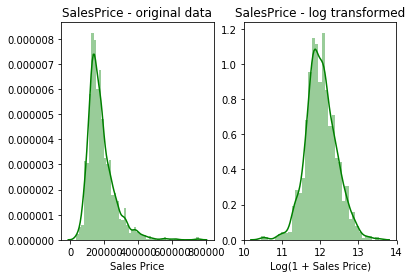

In [0]:
#transform SalesPrice with log(1+x) keep in new variables 'train_labels_log' 
train_labels = train['SalePrice']
train_labels_log = np.log1p(train['SalePrice'])

#histogram of label (SalesPrice)
plt.subplot(1, 2, 1)
sns.distplot(train_labels, color="g");
plt.title('SalesPrice - original data')
plt.xlabel('Sales Price')

plt.subplot(1, 2, 2)
sns.distplot(train_labels_log, color="g");
plt.title('SalesPrice - log transformed')
plt.xlabel('Log(1 + Sales Price)')

plt.show()

Our outcome variable, SalesPrice, is right skewed which is typical for monetary outcomes. We will log transform this outcome to achieve a normal distribution before fitting the models. 

<font color="red"> Inverse of transformation is numpy.expm1() which needs to be applied to get normal sales price results


# 6 Set up performance metric, k-fold validation and baseline model

Error metric is root mean squared error (RMSE) <br>

K-Fold Cross-Validation selected due to small size of training set (1460 examples) and no test data with labels available for evaluation <br>

Baseline comparison is median home value predictor, goal is to show improvement over baseline with our subsequent models

In [0]:
#basic rmse function created 
def rmse(labels, pred):
    return np.sqrt(mean_squared_error(labels, pred))

# Setup cross validation folds
k_fold = KFold(n_splits=5, random_state=0, shuffle=True)

# Define cross-validation error metric
def rmse_cv(model, X_name=train_data):
    rmse = np.sqrt(-cross_val_score(model, X=X_name, y=train_labels_log, scoring="neg_mean_squared_error", cv=k_fold))
    return (rmse)

#create baseline model on median home price
dummy_median = DummyRegressor(strategy='median')
dummy_regressor = dummy_median.fit(train_data, train_labels_log)

#just look at first five examples
some_data = train_data.iloc[:5]
some_labels = train_labels_log.iloc[:5]
print("Labels:", list(some_labels))
print("Baseline Predictions:", dummy_regressor.predict(some_data))

#baseline rmse score
score = rmse_cv(dummy_regressor)
print(f"Median Baseline with Cross Validation mean(sd): {round(score.mean(),4)} ({round(score.std(),4)})")


Labels: [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Baseline Predictions: [12.00151161 12.00151161 12.00151161 12.00151161 12.00151161]
Median Baseline with Cross Validation mean(sd): 0.4001 (0.0253)


# 7 Fit Models and report accuracy

## 7.1 KNN

KNN regressor already fitted with best scaler (MinMax) and gridsearchcv to identify best K.

In [0]:
#KNN optimised with best scaler and n-value
knn = make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors=13))
knn.fit(train_data, train_labels_log)
      
print("KNN Predictions:", knn.predict(some_data))
print("Labels:", list(some_labels))
print("KNN RMSE on 5 instances:", rmse(some_labels,knn.predict(some_data)))

#rmse results
print("\nKNN RMSE on Full Training Data:", rmse(train_labels_log,knn.predict(train_data)))

score = rmse_cv(knn)
print(f"KNN with Cross Validation mean(sd): {round(score.mean(),4)} ({round(score.std(),4)})")

KNN Predictions: [12.28092127 11.92360922 12.36411025 12.06998813 12.4713006 ]
Labels: [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
KNN RMSE on 5 instances: 0.13274831290403508

KNN RMSE on Full Training Data: 0.18752343301844138
KNN with Cross Validation mean(sd): 0.204 (0.0202)


In [0]:
#Demonstrate how to shift back to 'real prices' - this has bee implemented in...
#...Kaggle section below
print("KNN Predictions in real price terms:",np.floor(np.expm1(knn.predict(some_data))))
print("Labels:", list(np.floor(np.expm1(some_labels))))
print("KNN RMSE on 5 instances in real price terms:", 
      rmse(np.floor(np.expm1(some_labels)),np.floor(np.expm1(knn.predict(some_data)))))

KNN Predictions in real price terms: [215543. 150783. 234241. 174552. 260744.]
Labels: [208499.0, 181500.0, 223500.0, 139999.0, 249999.0]
KNN RMSE on 5 instances: 21990.388536813076


In [0]:
#delete once not needed (example of Grid Search CV) 

#use gridsearch to test values for n_neighbors
'''
param_grid = c
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(train_data, train_labels)
print(f"Best K is {grid_search.best_params_}")
'''

'\nparam_grid = c\nknn = KNeighborsRegressor()\ngrid_search = GridSearchCV(knn, param_grid, cv=5,scoring=\'neg_mean_squared_error\')\ngrid_search.fit(train_data, train_labels)\nprint(f"Best K is {grid_search.best_params_}")\n'

## 7.2 Linear Regression

Standard linear regression model and also with L2 Regularization (aka Ridge Regression)

In [0]:
#no scaler needed for linear regression (seems to make results worse!)
lin_reg = LinearRegression()
score = rmse_cv(lin_reg)
print(f"Linear Regression with Cross Validation mean(sd): {round(score.mean(),4)} ({round(score.std(),4)})")


Linear Regression with Cross Validation mean(sd): 0.1622 (0.0433)


In [0]:
#ridge regression (linear regression with L2 Regularization)
ridge_reg = Ridge(alpha=1, solver="cholesky")
score = rmse_cv(ridge_reg)
print(f"Ridge Regression with Cross Validation mean(sd): {round(score.mean(),4)} ({round(score.std(),4)})")

Ridge Regression with Cross Validation mean(sd): 0.1518 (0.0403)


##7.3 Decision Trees (primary focus)

Basic Decision Tree and Random Forest Models. Next step is to look at boosting and stacking techniques, starting with XGBRegressor - an implementation of gradient boosted decision trees designed for speed and performance.

In [0]:
# Set up Decision Tree Regressor
dectree_reg = make_pipeline(StandardScaler(), DecisionTreeRegressor())
score = rmse_cv(dectree_reg)
print(f"Decision Tree Regression with Cross Validation mean(sd): {round(score.mean(),4)} ({round(score.std(),4)})")

Decision Tree Regression with Cross Validation mean(sd): 0.2074 (0.0134)


In [0]:
# Set up Random Forest Regressor
ranfor_reg = make_pipeline(StandardScaler(), 
                           RandomForestRegressor(n_estimators=50, 
                                                 criterion='mae',
                                                 random_state=0))
score = rmse_cv(ranfor_reg)
print(f"Random Forest Regression with Cross Validation mean(sd): {round(score.mean(),4)} ({round(score.std(),4)})")

Random Forest Regression with Cross Validation mean(sd): 0.1457 (0.0177)


In [0]:
'''
scale=StandardScaler()
train_data2 = pd.DataFrame(scale.fit_transform(train_data))

rf = RandomForestRegressor(random_state=0)
type(train_data2)

#hypertune random forest
param_grid = [{'n_estimators':[50,100,200],'criterion': ['mae', 'mse'],
              'min_samples_split':[2,10,20],'max_depth':[None, 7, 14]}]

grid_search = GridSearchCV(rf, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(train_data2, train_labels_log)
print(f"Best parameters: {grid_search.best_params_}")
'''

pandas.core.frame.DataFrame

XGB: Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

In [0]:
# Set up XGB Regressor
XGBModel = make_pipeline(StandardScaler(), XGBRegressor(objective = 'reg:squarederror'))
score = rmse_cv(XGBModel)
print(f"XGB Regression with Cross Validation mean(sd): {round(score.mean(),4)} ({round(score.std(),4)})")


XGB Regression with Cross Validation mean(sd): 0.1301 (0.0196)


##7.4 Suppor Vector Machine Regression

Best kernel for SVM regressor is linear, gridsearch best C and episilon

In [0]:
# Set up SVM (Support Vector Machine) Regressor
svm_reg = make_pipeline(StandardScaler(), LinearSVR(max_iter=3000,C=.1))
#svm_reg = make_pipeline(StandardScaler(), SVR(kernel='linear',gamma='auto',C=5, epsilon=0.001))   
    
# train svm and get a CV score
score = rmse_cv(svm_reg)
print(f"SVM Regression with Cross Validation mean(sd): {round(score.mean(),4)} ({round(score.std(),4)})")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM Regression with Cross Validation mean(sd): 0.1716 (0.0482)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:

#use gridsearch on svm
'''
param_grid = [{'svr__epsilon':[0.001,0.01,0.1],'svr__C': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]}]
svm_reg = make_pipeline(StandardScaler(), SVR(kernel='linear',gamma='auto'))
grid_search = GridSearchCV(svm_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(train_data, train_labels_log)
print(f"Best paramater is {grid_search.best_params_}")

#svm_reg.get_params().keys()  #name of available parameters for grid search cv
'''

'\nparam_grid = [{\'svr__epsilon\':[0.001,0.01,0.1],\'svr__C\': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]}]\nsvm_reg = make_pipeline(StandardScaler(), SVR(kernel=\'linear\',gamma=\'auto\'))\ngrid_search = GridSearchCV(svm_reg, param_grid, cv=5,scoring=\'neg_mean_squared_error\')\ngrid_search.fit(train_data, train_labels)\nprint(f"Best paramater is {grid_search.best_params_}")\n\n#svm_reg.get_params().keys()  #name of available parameters for grid search cv\n'

##7.5 PCA for dimensionality reduction
Given we have over 300 features, we'll use PCA to see if we can reduce dimensionality while maintaining or improving model fit. Currently it looks like we can explain over 99% of the variance with 3 principle components, but we lose a lot of accuracy in our model fit when we limit it this way. Using 30 principle components, we lose approximately .01 on our RMSE score, however we can considerable modelling speed. Might use these version below hypertune our models and then use those parameters on the original dataset.





Cumulative explained variance: 
 [0.98281995 0.98790462 0.99128929 0.99406544 0.99647559 0.99844115
 0.99894053 0.99924728 0.99950449 0.9996875  0.99982589 0.99986686
 0.9999001  0.99993031 0.99995784 0.99997298 0.99998336 0.99999173
 0.99999775 0.99999976 0.99999984 0.99999985 0.99999986 0.99999987
 0.99999988 0.99999989 0.99999989 0.9999999  0.9999999  0.9999999
 0.99999991 0.99999991 0.99999991 0.99999992 0.99999992 0.99999992
 0.99999992 0.99999993 0.99999993 0.99999993 0.99999993 0.99999993
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999995 0.99999995]


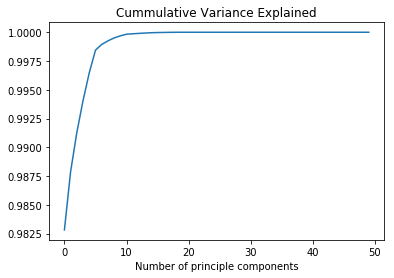

In [0]:
pca_mod = PCA(n_components = 50)
pca_mod.fit_transform(train_data)

k=range(50)
plt.plot(k, np.cumsum(pca_mod.explained_variance_ratio_))
plt.title("Cummulative Variance Explained")
plt.xlabel('Number of principle components')

print('\nCumulative explained variance: \n', np.cumsum(pca_mod.explained_variance_ratio_))

In [0]:
#create PCA instance with 3 components
pca_mod3 = PCA(n_components = 30)

#fit to train data
pca3 = pca_mod3.fit_transform(train_data)


In [0]:
#KNN optimised with best scaler and n-value
knn = make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors=13))
knn_pca_score = rmse_cv(knn,pca3)
print(f"KNN with PCA & CV mean(sd): {round(knn_pca_score.mean(),4)} ({round(knn_pca_score.std(),4)})")

KNN with PCA & CV mean(sd): 0.2428 (0.0289)


In [0]:
#ridge regression (linear regression with L2 Regularization)
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_pca_score = rmse_cv(ridge_reg,pca3)
print(f"Ridge Reg with PCA & CV mean(sd): {round(ridge_pca_score.mean(),4)} ({round(ridge_pca_score.std(),4)})")

Ridge Reg with PCA & CV mean(sd): 0.1577 (0.0362)


In [0]:
# Set up XGB Regressor
XGBModel = make_pipeline(StandardScaler(), XGBRegressor(objective = 'reg:squarederror'))
score = rmse_cv(XGBModel,pca3)
print(f"XGB Regression with PCA & CV mean(sd): {round(score.mean(),4)} ({round(score.std(),4)})")


XGB Regression with PCA & CV mean(sd): 0.1466 (0.0187)


In [0]:
# Set up SVM (Support Vector Machine) Regressor
svm_reg = make_pipeline(StandardScaler(), LinearSVR(max_iter=3000,C=.1))
#svm_reg = make_pipeline(StandardScaler(), SVR(kernel='linear',gamma='auto',C=5, epsilon=0.001))   
    
# train svm and get a CV score
score = rmse_cv(svm_reg,pca3)
print(f"SVM Regression with Cross Validation mean(sd): {round(score.mean(),4)} ({round(score.std(),4)})")

SVM Regression with Cross Validation mean(sd): 0.1533 (0.0456)


# 8 Model Summary




In [0]:
#print out all results from above, need to recode to name them something useful 

model_list = [knn, lin_reg, ridge_reg, dectree_reg, ranfor_reg, XGBModel, svm_reg]
model_name = ["KNN","Linear Reg","Ridge Reg", "Decision Tree", "Random Forest",
             "XGB Regressor", "SVM Reg"]
mean_score=[]
sd_score=[]
for i in range(0, len(model_list)):
    score = rmse_cv(model_list[i])
    mean_score.append(round(score.mean(),4))
    sd_score.append(round(score.std(),4))
    


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
summary = pd.DataFrame()
summary['Model']  = model_name
summary['Mean Score']  = mean_score
summary['Std Dev']  = sd_score
summary

,Model,Mean Score,Std Dev
0,KNN,0.2040,0.0202
1,Linear Reg,0.1622,0.0433
2,Ridge Reg,0.1518,0.0403
3,Decision Tree,0.2079,0.0104
4,Random Forest,0.1457,0.0177
5,XGB Regressor,0.1301,0.0196
6,SVM Reg,0.1713,0.0479


In [0]:
model_name = ["KNN","Linear Reg","Ridge Reg", "Decision Tree", "Random Forest",
             "XGB Regressor", "SVM Reg"]

#9 Kaggle Submission Section

This is a stand alone section to be run when feature engineering and hypertuning selected model is complete. Current version has a Kaggle score of 0.13989 which is #2422 on the leaderboard.

In [0]:
#import test data from Github
train = pd.read_csv('https://raw.githubusercontent.com/leebean337/housing/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/leebean337/housing/master/test.csv')

#remove sales price from train_data
train_data = train.drop('SalePrice',axis=1)

#clean data from both datasets
test_data = clean_and_missing(test)
train_data = clean_and_missing(train_data)

# Combine train and test data to ensure same transformation applied to both 
all_data = pd.concat([train_data, test_data]).reset_index(drop=True)

#apply subsequent transformation (ADD MORE HERE!!!)
all_data = one_hot_encoding_removeNA(all_data) 
# rest of FEATURE ENGINEERING pipeline to enter here

#split train and test data for model fit and predictions 
train_data = all_data.iloc[:len(train_labels), :]
test_data = all_data.iloc[len(train_labels):, :]

#fit FINAL chosen model and save predictions (UPDATE WITH FINAL MODEL)
XGB = make_pipeline(StandardScaler(), XGBRegressor(objective = 'reg:squarederror'))
xgb_reg = XGB.fit(train_data, train_labels_log)
final_predict = xgb_reg.predict(test_data)
final_tosubmit = np.floor(np.expm1(final_predict))

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': test_data.index+1,
                       'SalePrice': final_tosubmit})
output.to_csv('submission.csv', index=False)

# Next Steps

- Remove those with correlations more than .80 with a stronger feature, e.g. remove GarageYrBlt given high correlation with HouseYrBlt (PAUL)
- Remove outlier houses based on 'Special Note' (PAUL)
- Do "sensible_transformations" function, including e.g. adding variable has_Pool and removing current Poolarea and PoolQC variables (PAUL)
- Play with model performance testing and try different packages and feature engineering combos (PAUL)
- More time on decision tree/random forest options  (Gridsearch) (LEE)
- Reduce with PCA/rerun models with PCA (LEE)
- Create Table with Summary Results (LEE)